**Exercise**

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv('03_bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
# examine price_per_sqft column for mean median std max
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

The max is 1.2 crore which is too much price for price_per_sqft. It is an outlier and hence can be remove by using percentile and zscore

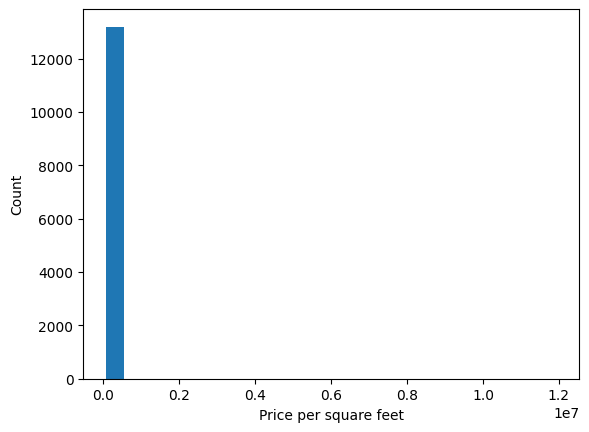

In [10]:
# Plotting histogram

plt.hist(df.price_per_sqft , bins=20, rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using log scale can make visualization little better

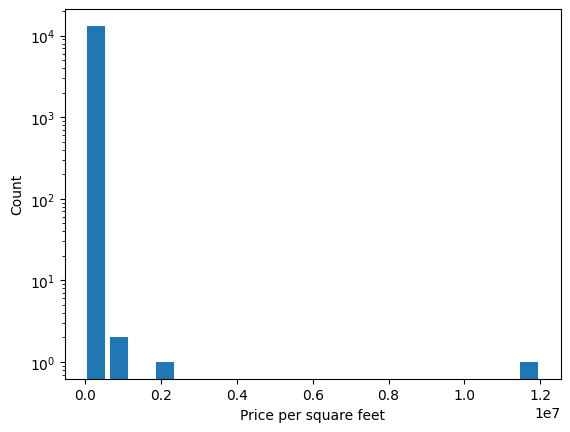

In [11]:

plt.hist(df.price_per_sqft , bins=20, rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least.

# (1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

In [13]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001,0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [20]:
outliers = df[ (df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit) ]
outliers.sample(28)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1005,other,1 BHK,15.0,1.0,30.0,1,200000
5343,other,9 BHK,42000.0,8.0,175.0,9,416
11635,Begur,3 BHK,2400.0,3.0,12.0,3,500
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [16]:
df2 = df[ (df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit) ]
df2.shape

(13172, 7)

In [17]:
df.shape

(13200, 7)

In [21]:
df.shape[0] - df2.shape[0]

28

**We removed total 28 outliers**

# (2) Now remove outliers using 4 standard deviation

In [22]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit , min_limit

(np.float64(23227.73653589432), np.float64(-9900.429065502582))

In [23]:
df2[(df2.price_per_sqft>max_limit)| (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
6134,Basavangudi,6 Bedroom,1754.0,6.0,650.0,6,37058
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
2825,HBR Layout,9 Bedroom,1200.0,6.0,280.0,9,23333
5747,other,5 Bedroom,1200.0,5.0,300.0,5,25000
8082,Nagarbhavi,4 Bedroom,1200.0,3.0,340.0,4,28333
3752,other,4 Bedroom,1200.0,4.0,300.0,4,25000
1721,other,5 Bedroom,2400.0,5.0,625.0,5,26041
4357,other,4 Bedroom,3250.0,5.0,850.0,4,26153
5654,other,4 Bedroom,4920.0,5.0,1150.0,4,23373


In [24]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [25]:
df2.shape[0]-df3.shape[0]

125

In this step we removed total 125 outliers

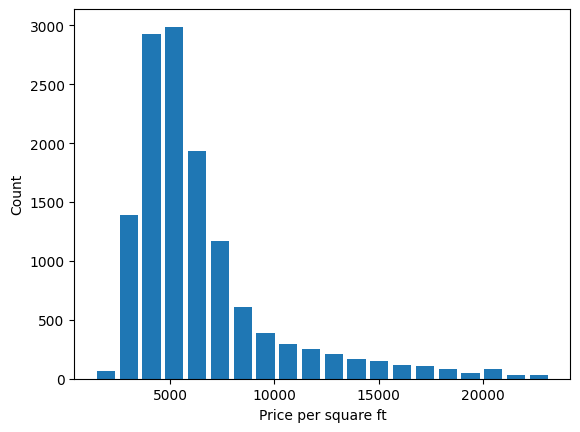

In [26]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

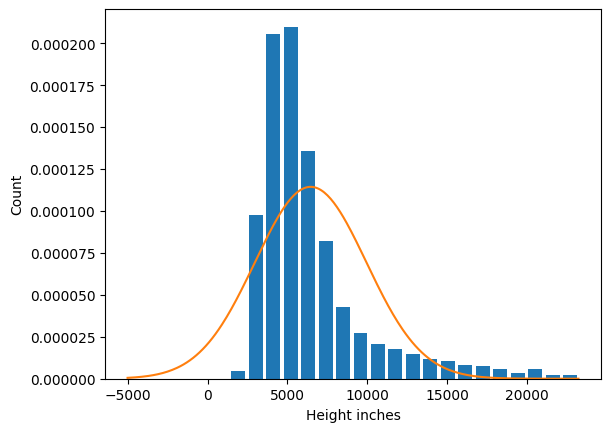

In [28]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height inches')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)

plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean(), df3.price_per_sqft.std()))

# (3) Now remove outliers using z score. Use z score of 4 as your thresold

In [29]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\hassa\AppData\Local\Temp\ipykernel_14520\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
5488,Sahakara Nagar,4 BHK,2500.0,4.0,200.0,4,8000,0.322709
4866,Kaggalipura,2 BHK,950.0,2.0,47.0,2,4947,-0.414548
6039,other,3 BHK,1455.0,2.0,55.0,3,3780,-0.696363
285,other,2 BHK,1084.0,2.0,50.0,2,4612,-0.495446
192,Marathahalli,2 BHK,1200.0,2.0,60.0,2,5000,-0.401750
158,other,3 BHK,1350.0,2.0,48.0,3,3555,-0.750697
8293,Amruthahalli,3 BHK,1450.0,2.0,85.0,3,5862,-0.193588
3505,Narayanapura,3 BHK,1485.0,3.0,85.0,3,5723,-0.227155
2933,Yelahanka New Town,3 BHK,1610.0,3.0,92.0,3,5714,-0.229328
8852,Whitefield,4 Bedroom,1920.0,5.0,250.0,4,13020,1.534971


In [31]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore > 4) ]
outliers_z.shape

(125, 8)

In [32]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
6959,Raja Rajeshwari Nagar,4 Bedroom,1350.0,4.0,340.0,4,25185,4.472652
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
12051,Malleshwaram,5 Bedroom,3000.0,4.0,900.0,5,30000,5.635409
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725


In [33]:
df4=df2[ (df2.zscore>-4 ) & (df2.zscore < 4 ) ]
df4.shape

(13047, 8)

In [34]:
df2.shape[0] - df4.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation